In [87]:
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss

In [88]:
df = pd.read_csv(r"Liver_disease_data.csv")
df.head(3)

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0


In [89]:
df.isnull().sum()
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


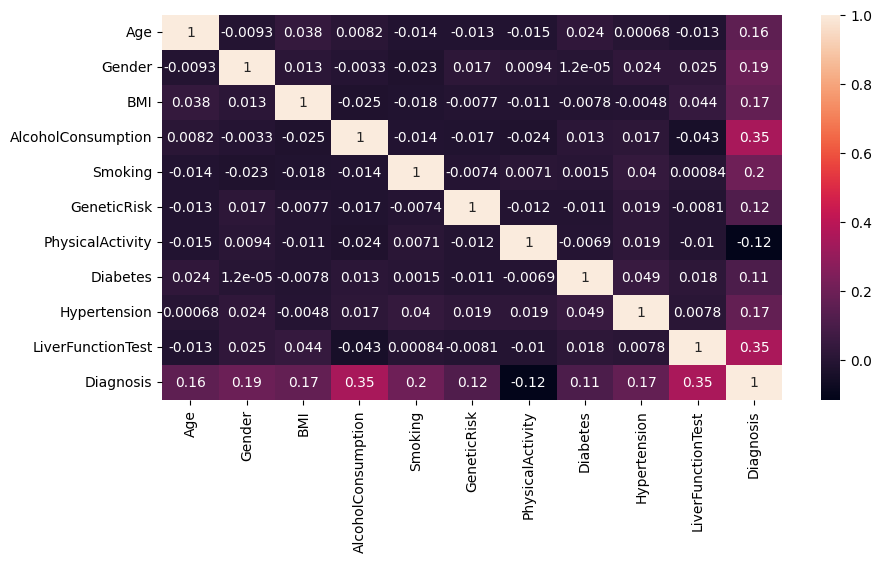

In [90]:
plt.figure(figsize = (10,5))
sns.heatmap(data= df.corr(), annot  = True)
plt.show()

In [160]:
x = df.drop("Diagnosis", axis = 1)
y = df["Diagnosis"]
s = StandardScaler()
x = s.fit_transform(x)
pf = PolynomialFeatures(degree = 2)
x = pf.fit_transform(x)

In [161]:
x_train, x_remaining, y_train, y_remaining = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [162]:
x_cv, x_test, y_cv, y_test = train_test_split(x_remaining, y_remaining, test_size = 0.5, random_state = 42)

In [171]:
lr = LogisticRegression(penalty='l1',solver='liblinear', C=1, random_state=42, max_iter=10000)

In [172]:
lr.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')

In [173]:
y_predict = lr.predict_proba(x_train)
y_dev_predict = lr.predict_proba(x_cv)
J_train = log_loss(y_train, y_predict)
J_cv = log_loss(y_cv, y_dev_predict)

J_train, J_cv

(0.337816711805148, 0.35563340112297354)

In [174]:
lr.score(x_test, y_test)*100

83.52941176470588

In [175]:
y_pred = lr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8352941176470589
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        78
           1       0.81      0.90      0.86        92

    accuracy                           0.84       170
   macro avg       0.84      0.83      0.83       170
weighted avg       0.84      0.84      0.83       170



In [128]:
dt = DecisionTreeClassifier()

In [129]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
dt.score(x_test, y_test)*100

83.82352941176471

In [148]:
svm_poly = SVC(kernel='linear', degree=3, C=1.0, random_state=42)
svm_poly.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [149]:
svm_poly.score(x_test, y_test)*100

80.29411764705883